In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Read data 

In [2]:
json_path = 'data\Subtyping-Staging-Purity-FGA.json'
data = json.load(open(json_path, 'r'))

In [3]:
categorical_data = defaultdict(lambda: defaultdict(int))
continuous_data = defaultdict(list)

In [11]:
for _, tasks in data.items():
    for task_name, task_data in tasks.items():
        if task_name == "lung-cancer-subtyping" or task_name == "AJCC_PATHOLOGIC_TUMOR_STAGE_reduced":
            categorical_data[task_name][task_data['label']] += 1            
        else:
            continuous_data[task_name].append(task_data['label'])

print(categorical_data["lung-cancer-subtyping"])
print((categorical_data['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']))
print(len(continuous_data['purity']))
print(len(continuous_data['FRACTION_GENOME_ALTERED']))


defaultdict(<class 'int'>, {'lusc': 166, 'normal': 92, None: 8, 'luad': 146})
defaultdict(<class 'int'>, {'Early Stage': 258, None: 105, 'Late Stage': 49})
412
412


## Purity Distribution

In [12]:
purity_values = continuous_data["purity"]

In [8]:
# Get non-null values
filtered_purity_values = [value for value in purity_values if value is not None]
non_zero_puriy_values = [value for value in filtered_purity_values if value > 0]
num_null_values = len(purity_values) - len(filtered_purity_values)
print(f"Number of null values: {num_null_values}")
print(f"Number of non-null values: {len(filtered_purity_values)}")
print(f"Number of non-zero values: {len(non_zero_puriy_values)}")

Number of null values: 14
Number of non-null values: 398
Number of non-zero values: 306


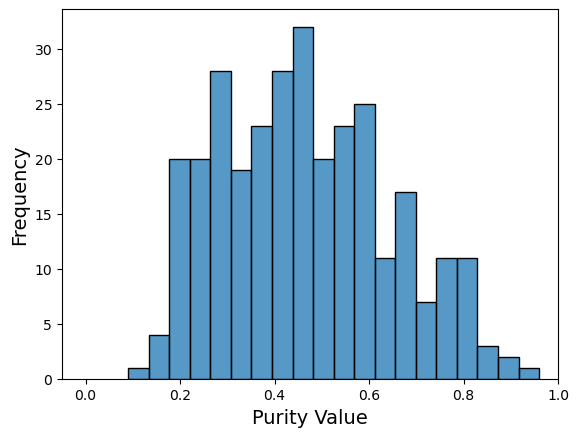

In [26]:
fig, axes = plt.subplots()
sns.histplot(data=filtered_purity_values, ax=axes, bins=20)
axes.set_xlabel('Purity Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of Purity (Excluding Null Values)", wrap=True,fontsize=14)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\1-purity\purity_distribution.png', dpi = 600)
plt.show()

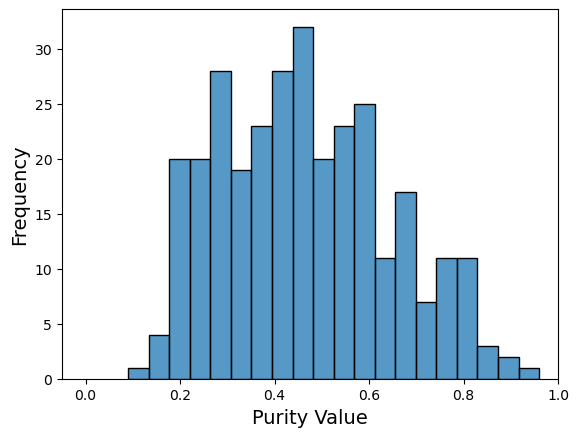

In [10]:
# Non zero plot
fig, axes = plt.subplots()
sns.histplot(data=non_zero_puriy_values, ax=axes, bins=20)
axes.set_xlabel('Purity Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of Purity (Excluding Null Values)", wrap=True,fontsize=14)
plt.show()

In [24]:
# Performing the Shapiro-Wilk test for normality on 'purity' and 'purity_non_zero'
import scipy.stats as stats
print(len(filtered_purity_values))
shapiro_purity = stats.shapiro(filtered_purity_values)
shapiro_purity

306


ShapiroResult(statistic=0.9759637713432312, pvalue=5.2469193178694695e-05)

- The test statistic is approximately 0.938, with a p-value of $7.23 \times 10^{-12}$.
Very small p-values reject the null hypothesis of the data coming from a normally distributed population => data for 'purity' and are not normally distributed.



In [12]:
shapiro_purity = stats.shapiro(non_zero_puriy_values)
shapiro_purity

ShapiroResult(statistic=0.9759637713432312, pvalue=5.2469193178694695e-05)

- The test statistic is approximately 0.973, with a p-value of $5.246 \times 10^{-05}$.
 => data for 'purity non-zero' and are not normally distributed.

## FGA Distribution

In [13]:
fga_values = continuous_data["FRACTION_GENOME_ALTERED"]

In [14]:
filtered_fga_values = [value for value in fga_values if value is not None]
non_zero_fga_values = [value for value in filtered_fga_values if value > 0]
num_null_values = len(purity_values) - len(filtered_fga_values)
print(f"Number of null values: {num_null_values}")
print(f"Number of non-null values: {len(filtered_fga_values)}")
print(f"Number of non-zero values: {len(non_zero_fga_values)}")

Number of null values: 101
Number of non-null values: 311
Number of non-zero values: 306


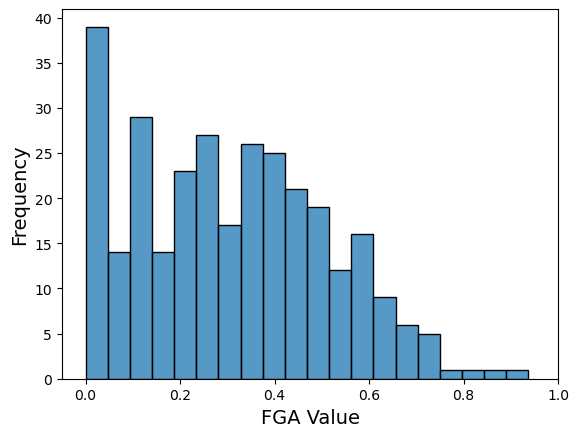

In [27]:
fig, axes = plt.subplots()
sns.histplot(data=filtered_fga_values, ax=axes, bins=20)
axes.set_xlabel('FGA Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of FGA (Excluding Null Values)", wrap=True,fontsize=14)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\2-fga\fga_distribution.png', dpi = 600)
plt.show()

In [16]:
shapiro_purity = stats.shapiro(filtered_fga_values)
shapiro_purity

ShapiroResult(statistic=0.9677518010139465, pvalue=2.0446343569346936e-06)

-> not normally distributed => Spearman's rank correlation

## Purity-FGA

In [17]:
purity_values = []
fga_values = []

for key, value in data.items():
    purity = value.get("purity", {}).get("label")
    fga = value.get("FRACTION_GENOME_ALTERED", {}).get("label")
    
    if purity is not None and fga is not None:
        purity_values.append(purity)
        fga_values.append(fga)



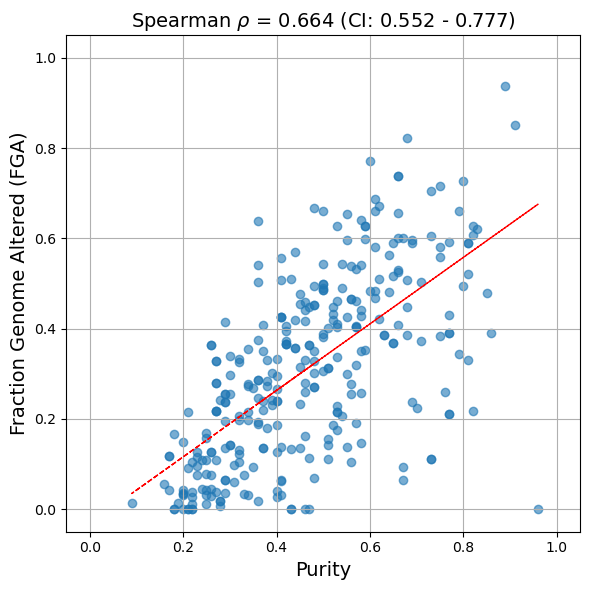

In [28]:
fit = np.polyfit(purity_values, fga_values, 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(6, 6))
plt.scatter(purity_values, fga_values, alpha=0.6)
plt.plot(purity_values, fit_fn(purity_values), 'r--', lw=1)

plt.xlim((-0.05, 1.05))
plt.xticks(np.arange(0, 1.05, 0.2))
plt.ylim((-0.05, 1.05))
plt.yticks(np.arange(0, 1.05, 0.2))
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Fraction Genome Altered (FGA)', fontsize=14)
plt.title('Spearman $\\rho$ = 0.664 (CI: 0.552 - 0.777)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\purity_fga_scatter.png', dpi = 600)
plt.show()

In [19]:
# Calculating Spearman's rank correlation coefficient between 'purity' and 'fga'
purity_fga_pairs = zip(purity_values, fga_values)
filtered_pairs = [(purity, fga) for purity, fga in purity_fga_pairs if purity is not None and fga is not None]
filtered_purity_values, filtered_fga_values = zip(*filtered_pairs)
spearman_corr, spearman_p_value = stats.spearmanr(filtered_purity_values, filtered_fga_values)
spearman_corr, spearman_p_value


(0.66475139319174, 2.170702971715082e-40)

-> Positive monotonic relationship, small p-value -> correlation are stats significant

To calculate the confidence interval for a Spearman rank correlation coefficient, use the following formula, which approximates the confidence interval based on the Fisher transformation:

$ \text{CI} = r \pm z \times \text{SE} $

where:
- $ r $ is the Spearman rank correlation coefficient,
- $ z $ is the z-score corresponding to the desired confidence level (e.g., 1.96 for 95% confidence interval),
- $ \text{SE} $ is the standard error of the correlation coefficient, given by $ \text{SE} = \frac{1}{\sqrt{N-3}} $, with $ N $ being the number of pairs.

In [20]:
N = len(filtered_pairs)
SE = 1 / np.sqrt(N - 3)
z_score = 1.96
margin_of_error = z_score * SE
CI_lower = spearman_corr - margin_of_error
CI_upper = spearman_corr + margin_of_error
CI_lower, CI_upper

(0.5521523352259405, 0.7773504511575395)

## Categorical values

In [29]:
subtyping_df = pd.DataFrame.from_dict(categorical_data['lung-cancer-subtyping'], orient='index', columns=['Count'])
subtyping_df = subtyping_df.sort_values('Count', ascending=False)
print(subtyping_df)

        Count
lusc      166
luad      146
normal     92
None        8


In [30]:
staging_df = pd.DataFrame.from_dict(categorical_data['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'], orient='index', columns=['Count'])
staging_df = staging_df.sort_values('Count', ascending=False)
print(staging_df)

             Count
Early Stage    258
None           105
Late Stage      49


## Staging-Purity

In [4]:
excel_file_path = r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\eda.xlsx'

staging_df = pd.read_excel(excel_file_path, sheet_name='staging labels', index_col=0)

staging_df


,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced,purity,FRACTION_GENOME_ALTERED
Sample,,,
0,Early Stage,0.48,0.2702
1,Early Stage,0.48,0.2702
2,NaN,0.00,NaN
3,NaN,0.00,NaN
4,Early Stage,0.29,0.2552
...,...,...,...
407,Late Stage,0.53,0.3365
408,Early Stage,0.50,0.5443
409,Late Stage,0.52,0.4490


In [5]:
staging_purity_df = staging_df[['purity', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']]
staging_purity_df.dropna(subset=['purity', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced' ], inplace=True)
staging_purity_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11912\589001291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  staging_purity_df.dropna(subset=['purity', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced' ], inplace=True)


,purity,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced
Sample,,
0,0.48,Early Stage
1,0.48,Early Stage
4,0.29,Early Stage
5,0.29,Early Stage
8,0.77,Late Stage
...,...,...
407,0.53,Late Stage
408,0.50,Early Stage
409,0.52,Late Stage


In [6]:
print(staging_purity_df['purity'].mean())
print(staging_purity_df['purity'].std())

0.4660465104932401
0.17903626534328224


In [7]:
early_stage_purity_df = staging_purity_df[staging_purity_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']
late_stage_purity_df = staging_purity_df[staging_purity_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']
print(len(early_stage_purity_df))
print(len(late_stage_purity_df))

254
47


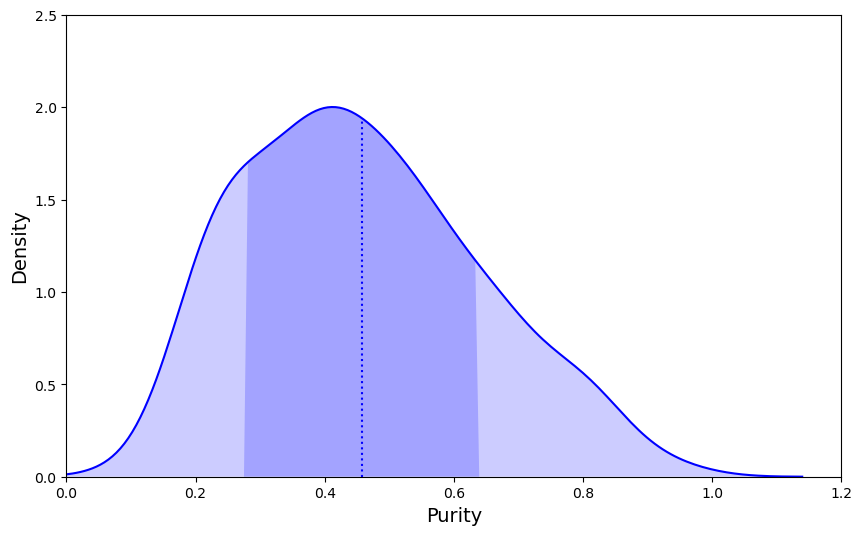

In [120]:
plt.figure(figsize=(10, 6))
early_stage_purity = early_stage_purity_df['purity']
ax = sns.kdeplot(early_stage_purity, color="blue", fill=False, label='Early Stage')
early_mean = early_stage_purity.mean()
early_std = early_stage_purity.std()
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev

plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)
plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\early_stage_purity.png', dpi = 600)

plt.show()


In [9]:
print(early_mean)
print(early_std)

0.4577559047913922
0.18092014331537634


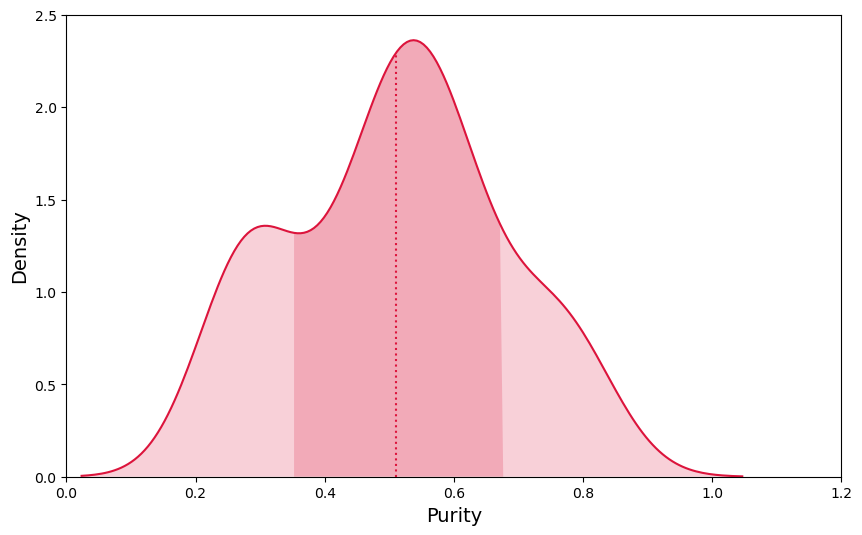

In [10]:
plt.figure(figsize=(10, 6))

late_stage_purity = late_stage_purity_df['purity']
ax2 = sns.kdeplot(late_stage_purity, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage_purity.mean()
late_std = late_stage_purity.std()
kdeline2 = ax2.lines[0]
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2

plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, facecolor='crimson', alpha=0.2)
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)
plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
# plt.title('Distribution of Purity by Late Stage')
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\late_stage_purity.png', dpi = 600)
plt.show()

In [51]:
print(late_mean)
print(late_std)

0.5108510604564177
0.16306613217394014


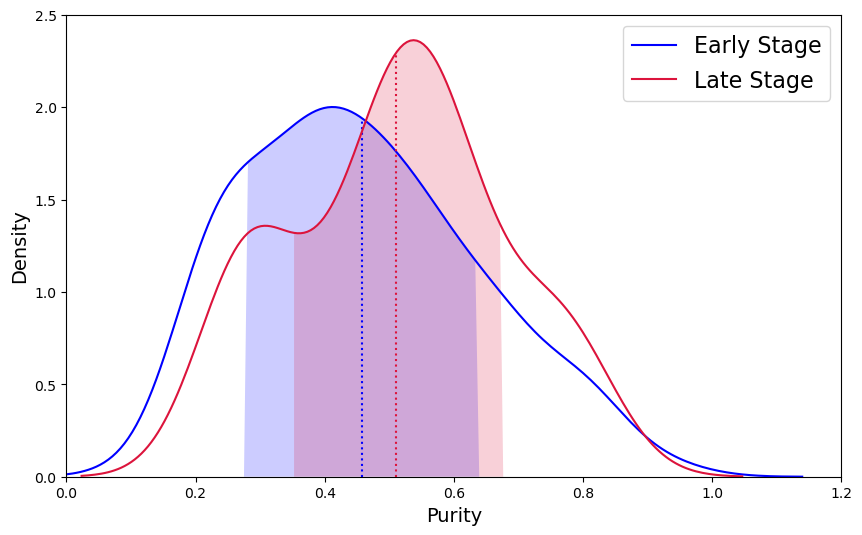

In [121]:
plt.figure(figsize=(10, 6))

# Early Stage Plot
early_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']['purity']
sns.kdeplot(early_stage, color="blue", fill=False, label='Early Stage')
early_mean = early_stage.mean()
early_std = early_stage.std()
kdeline = plt.gca().lines[0] 
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)

# Late Stage Plot
late_stage = staging_df[staging_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']['purity']
sns.kdeplot(late_stage, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage.mean()
late_std = late_stage.std()
kdeline2 = plt.gca().lines[1]  
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
# plt.title('Distribution of Purity by Stage')
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=16)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\stage_purity.png', dpi = 600)
plt.show()


- KDE: approximate the histogram with a continous function using kernel density estimation
- Cons: a bit of black box and might mask relevant


- For the early stage, this peak is centered around a lower purity value than the late stage, suggesting that early-stage tumors tend to have lower purity on average.
- The early-stage tumor distribution appears to have a tighter spread (smaller standard deviation), while the late-stage tumor distribution is more spread out (larger standard deviation). This implies that tumor purity varies more widely in late-stage tumors than in early-stage tumors.
- Skewness: The late-stage distribution appears slightly right-skewed, meaning there's a tail extending towards higher purity values. .

## Different types of distribution comparison

In [55]:

# Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Plot settings
#plt.style.use('seaborn')
sns.set_theme(style="ticks")
mpl.rcParams['figure.figsize'] = (10, 6)

# Theme
palette = ['#003f5c', '#ff6e54', '#2db88b', '#003f5c', '#ff6e54', '#2db88b', '#003f5c', '#ff6e54', '#2db88b', '#003f5c']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette) 

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 20

# Axes labels
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelweight'] = 'bold'

# Grid and thicks
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
#mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['ytick.left'] = False

# Legend
mpl.rcParams['legend.facecolor'] = 'w'
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.facecolor'] = 'white'
mpl.rcParams['legend.edgecolor'] = 'gray'
mpl.rcParams['legend.borderpad'] = 0.6

# Other
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['scatter.edgecolors'] = 'none'
mpl.rcParams['patch.edgecolor'] = 'none'

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_palette(sns.color_palette("colorblind"))


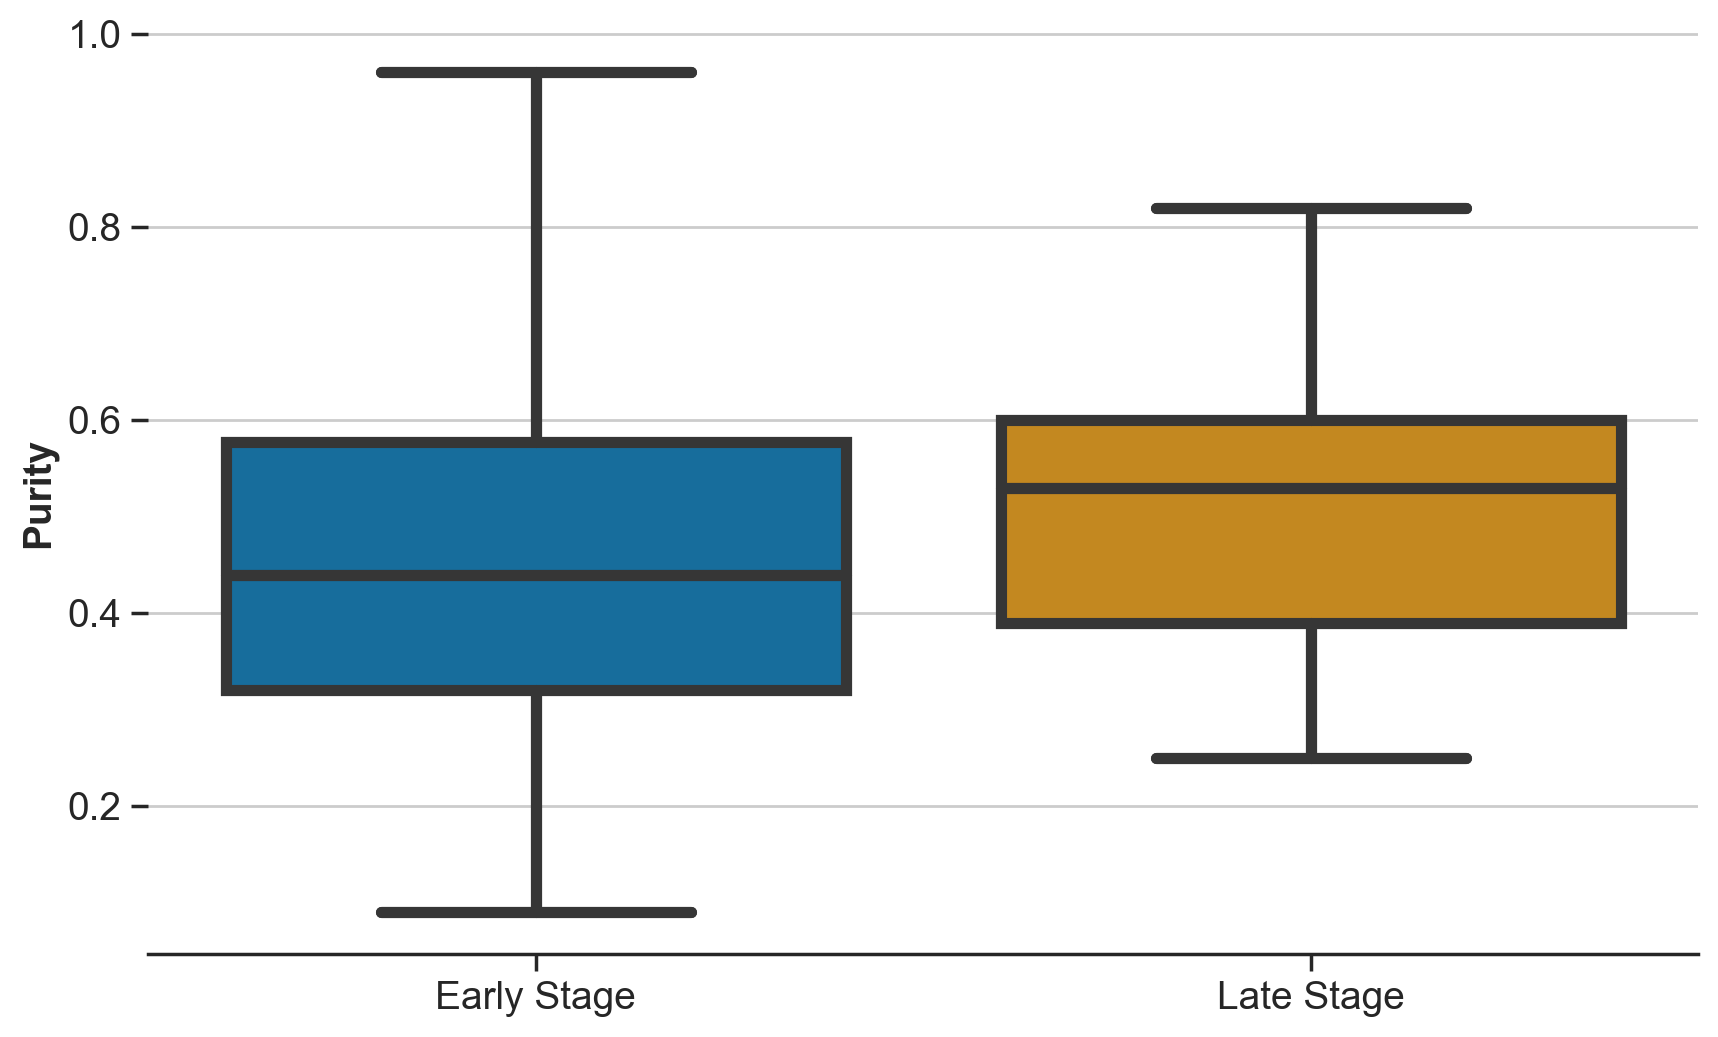

In [58]:
sns.boxplot(data=staging_purity_df, x='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced', y='purity')
box_plot = sns.boxplot(
    data=staging_purity_df, 
    x='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced', 
    y='purity',
    order=["Early Stage", "Late Stage"],
)
box_plot.set_xlabel("")
box_plot.set_ylabel("Purity", fontsize=14)
box_plot.tick_params(labelsize=14)

plt.show()

- Box plot: Center represents median, borders represent quartile Q1 and Q3, whiskers (lines extending parallel from the boxes) extend to the first data points that are more than 1.5 times the interquartile range (Q3 — Q1) outside the box - represent variability of data, points plotted individually are outliers
- Cons: tell data stats, but hide data distribution

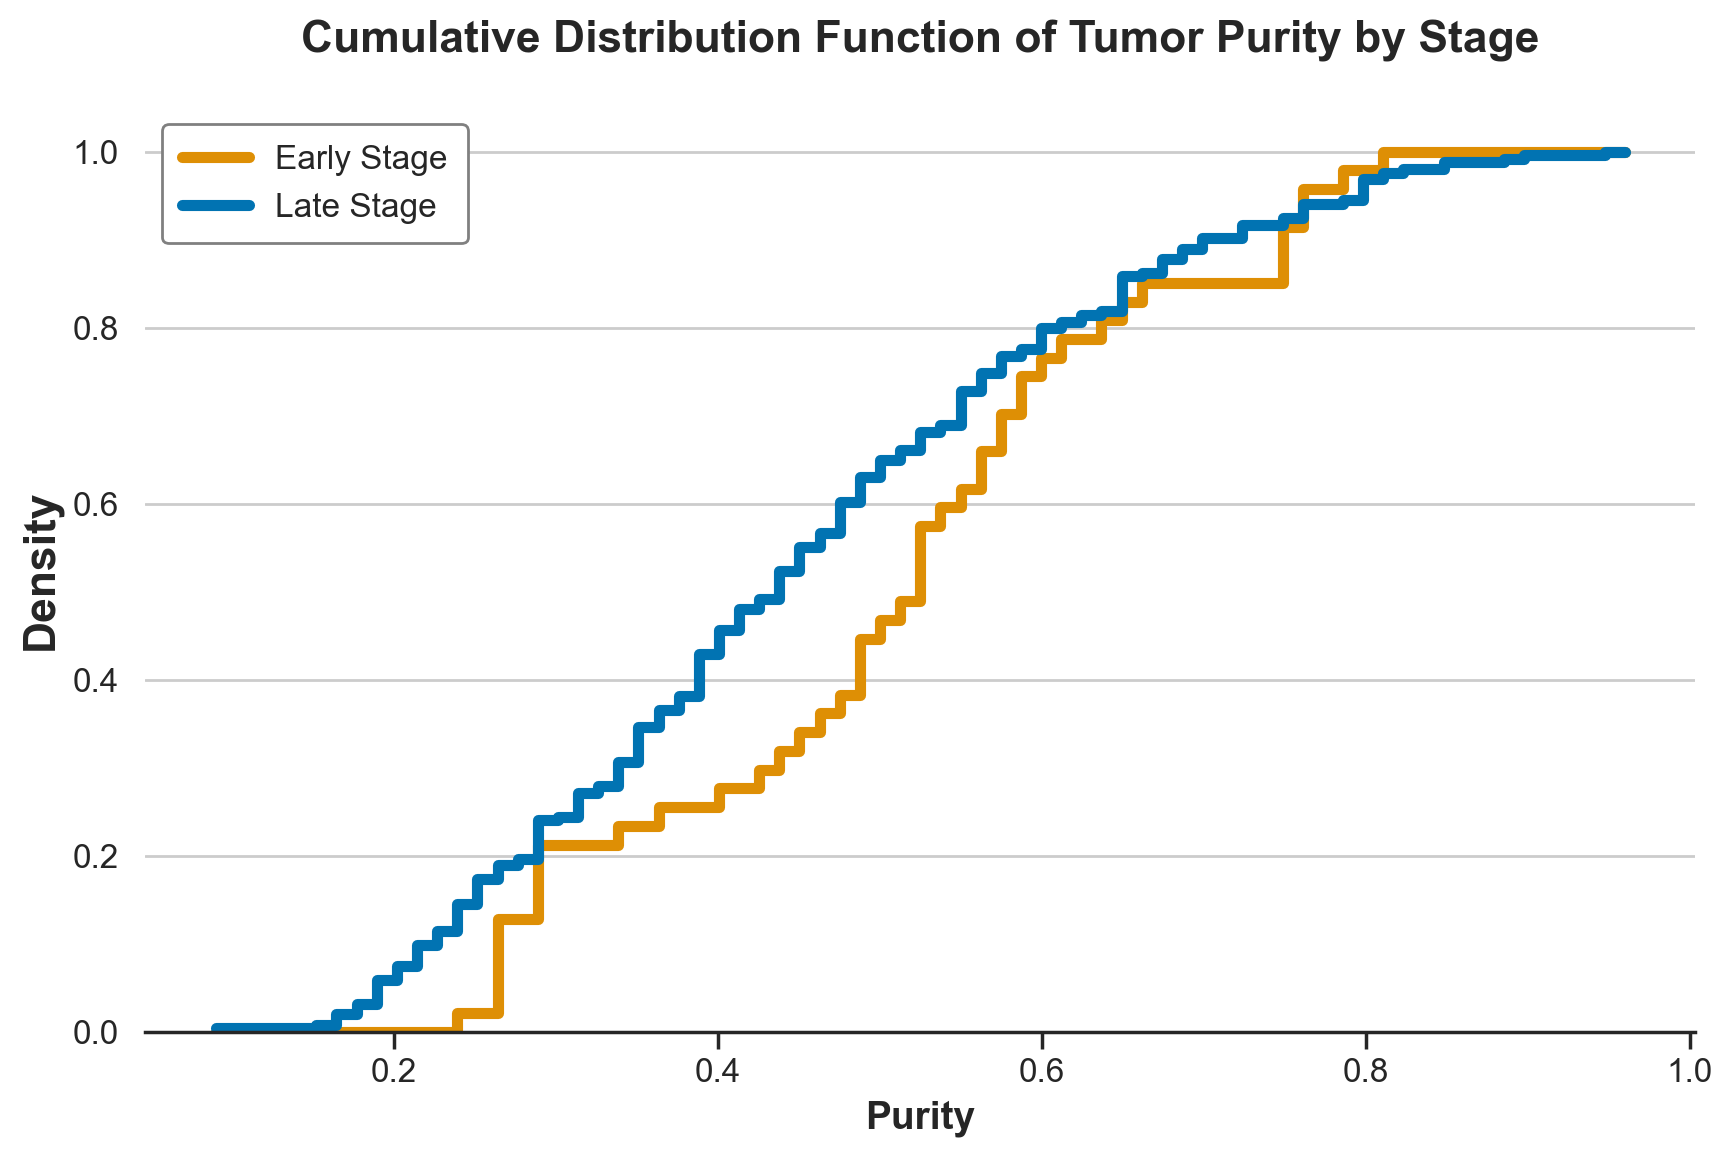

In [26]:
cdf_plot = sns.histplot(
    x='purity', 
    data=staging_purity_df, 
    hue='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced',
    bins=len(np.unique(staging_purity_df['purity'])), 
    stat="density",
    element="step",
    fill=False,
    cumulative=True,
    common_norm=False,
    legend=False
)
cdf_plot.set_title("Cumulative Distribution Function of Tumor Purity by Stage", fontsize=16) 
cdf_plot.set_xlabel("Purity", fontsize=14)
cdf_plot.tick_params(labelsize=12)
plt.legend( labels=['Early Stage', 'Late Stage'], fontsize=12)

plt.show()


- Cumulative distribution: at each point of the x-axis, plot the % of data points that equal or lower value -> represent all data points without any approximation
- Cross at about 0.8 -> 

In [108]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True

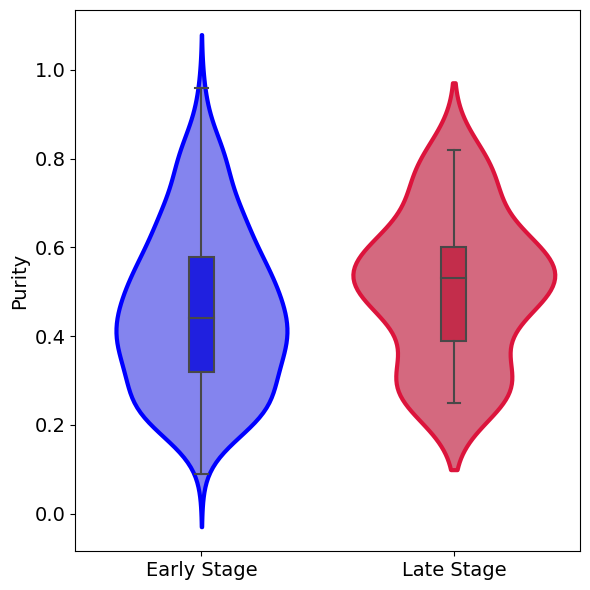

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
violin_plot = sns.violinplot(
    y='purity',
    x='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced',
    data=staging_purity_df,
    palette=['#7373FF', '#E65774'],
    inner=None,
    # saturation=0.7,
    ax=ax
)
colors = ['blue', 'crimson']
for i, patch in enumerate(violin_plot.collections[::1]):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(3)

box_plot = sns.boxplot(
    data=staging_purity_df, 
    x='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced', 
    y='purity',
    order=["Early Stage", "Late Stage"],
    width=0.1,
    boxprops={'zorder': 2},
    palette=['blue', 'crimson'],
)


violin_plot.set_ylabel("Purity", fontsize=14)
violin_plot.set_xlabel("", fontsize=14)
violin_plot.tick_params(labelsize=14)
violin_plot.grid(False)
plt.tight_layout()
plt.show()


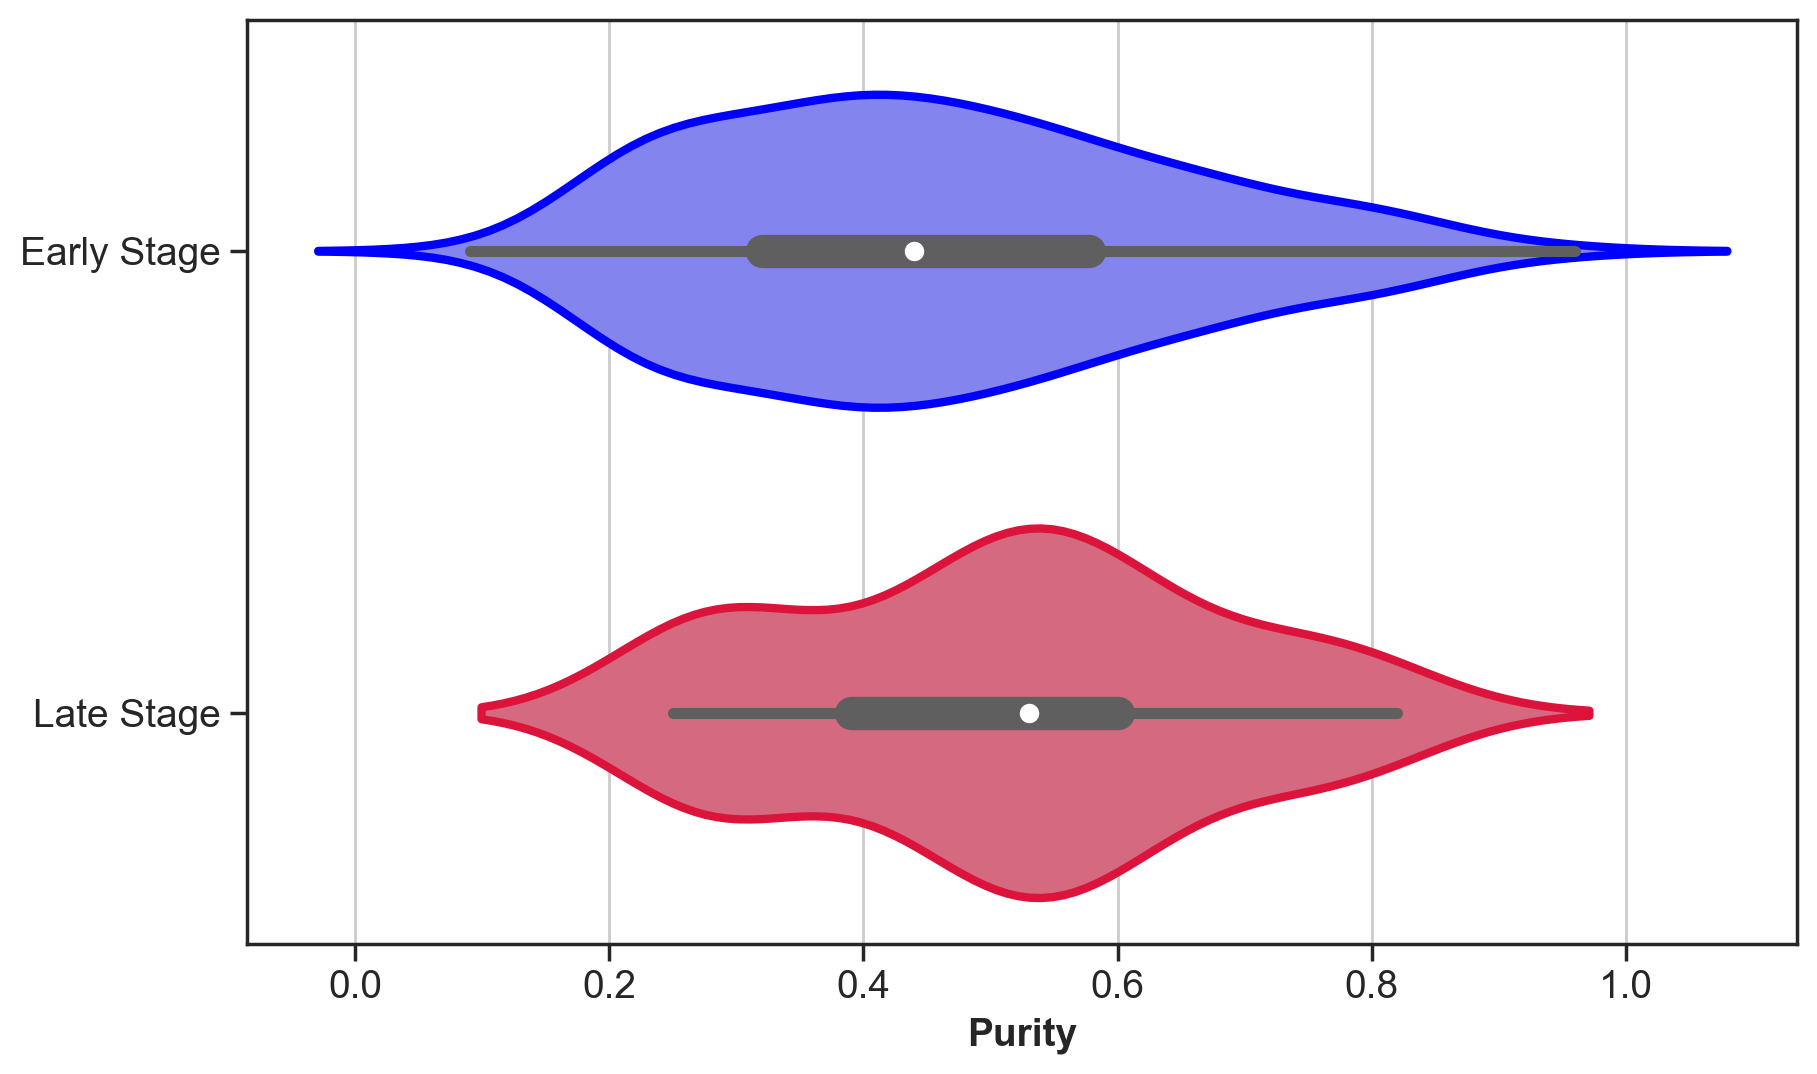

In [138]:
fig, ax = plt.subplots(figsize=(10, 6))
violin_plot = sns.violinplot(
    x='purity',
    y='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced',
    data=staging_purity_df,
    palette=['#7373FF', '#E65774'],
    ax = ax
)
colors = ['blue', 'crimson']
for i, patch in enumerate(violin_plot.collections[::2]):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(3)


violin_plot.set_xlabel("Purity", fontsize=14)
violin_plot.set_ylabel("", fontsize=14)
violin_plot.tick_params(labelsize=14)
violin_plot.grid(False)
violin_plot.grid(axis='x')



### Stats Test


**Parametric Tests vs. Non-parametric Tests**
- Parametric: 
  - assume that the data follows a specific distribution, typically a normal distribution. They also assume homogeneity of variances (equal variances across groups) and interval or ratio scale of measurement. 
  - Use when data is/approximately normally distributed (could be relax for sufficiently large sample size - CLT), variances are measured on an interval or ratio scale
  - i.e., t-test, ANOVA, etc.
- Non-parametric: 
  - do not assume a specific distribution for the data
  - Use when data are not follow a normal dist., data is ordinal, ranked, or not measured on an interval or ratio scale; small sample size; deal with outliers
  - i.e. Mann-Whitney U test (for two independent samples), Wilcoxon signed-rank test (for paired samples), Kruskal-Wallis H test (for comparing more than two groups).

Compare the distribution of 2 groups:
- Check distribution: (Shapiro-Wilk test, histograms or QQ plots)
- Choose parametric or non-parametric test base on sample size and normality
Popular tests:
- Parametric: 
  - Independent Samples t-test (also known as Unpaired t-test): Compares the means of two independent groups under the assumption of normal distribution and equal variances (homoscedasticity). If variances are unequal, a variation known as Welch's t-test can be used.
  - Paired Samples t-test: Used when the two samples are related or matched in some way (e.g., measurements taken before and after a treatment on the same subjects). This test compares the mean difference to zero.
- Non-parametric:
  - Mann-Whitney U Test (also known as Wilcoxon Rank-Sum Test): popular for non-normal dist. data
  - Kolmogorov-Smirnov Test: sensitive to any differences in the two distributions, less concerned with means or medians and more interested in comparing the overall shape of the distributions



In [57]:
from scipy.stats import shapiro, mannwhitneyu

In [13]:
sw_early = shapiro(early_stage_purity)
sw_late = shapiro(late_stage_purity)
sw_early, sw_late

(ShapiroResult(statistic=0.973863422870636, pvalue=0.00012821723066736013),
 ShapiroResult(statistic=0.9453601837158203, pvalue=0.02857477404177189))

Both p-values are less than the common alpha level of 0.05 -> reject the null hypothesis for normality -> the assumption of normality is violated for both early and late-stage tumor purity data.

In [15]:
# Mann-Whitney U test for comparing medians if the data is not normally distributed
mwu_test_result = mannwhitneyu(early_stage_purity, late_stage_purity)
mwu_test_result

MannwhitneyuResult(statistic=4800.5, pvalue=0.033057079461260075)

In [ ]:
mwu_test_result = mannwhitneyu(early_stage_purity, late_stage_purity, a;)
mwu_test_result

p-value < 0.05 => significant difference in the distribution of tumor purity between the two stages

## Staging-FGA

In [81]:
staging_fga_df = staging_df[['FRACTION_GENOME_ALTERED', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']]
staging_fga_df.dropna(subset=['FRACTION_GENOME_ALTERED', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced' ], inplace=True)
staging_fga_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11912\2485139145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  staging_fga_df.dropna(subset=['FRACTION_GENOME_ALTERED', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced' ], inplace=True)


,FRACTION_GENOME_ALTERED,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced
Sample,,
0,0.2702,Early Stage
1,0.2702,Early Stage
4,0.2552,Early Stage
5,0.2552,Early Stage
8,0.3907,Late Stage
...,...,...
407,0.3365,Late Stage
408,0.5443,Early Stage
409,0.4490,Late Stage


In [59]:
print(staging_fga_df['FRACTION_GENOME_ALTERED'].mean())
print(staging_fga_df['FRACTION_GENOME_ALTERED'].std())

0.3109826806159102
0.2033048546460433


In [83]:
early_stage_fga_df = staging_fga_df[staging_fga_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Early Stage']
late_stage_fga_df = staging_fga_df[staging_fga_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'] == 'Late Stage']
print(len(early_stage_fga_df))
print(len(late_stage_fga_df))

258
48


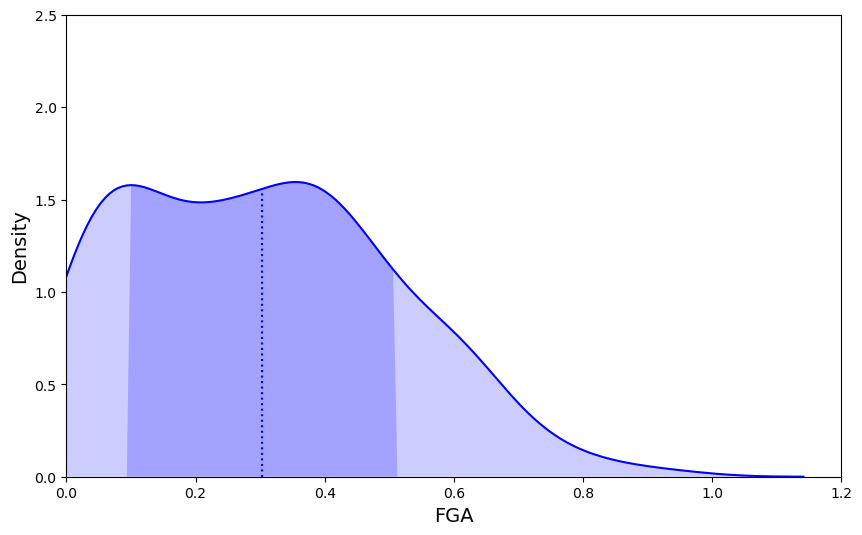

In [84]:
plt.figure(figsize=(10, 6))
early_stage_fga = early_stage_fga_df['FRACTION_GENOME_ALTERED']
ax = sns.kdeplot(early_stage_fga, color="blue", fill=False, label='Early Stage')
early_mean = early_stage_fga.mean()
early_std = early_stage_fga.std()
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev

plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)
plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
plt.xlabel('FGA', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\early_stage_fga.png', dpi = 600)

plt.show()


In [85]:
print(early_mean)
print(early_std)

0.30255232660837345
0.20635986662977768


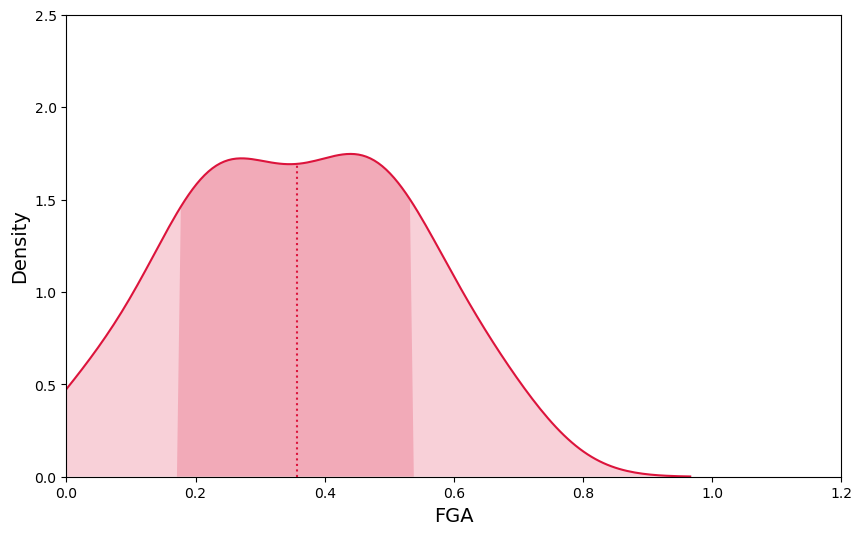

In [86]:
plt.figure(figsize=(10, 6))

late_stage_fga = late_stage_fga_df['FRACTION_GENOME_ALTERED']
ax2 = sns.kdeplot(late_stage_fga, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage_fga.mean()
late_std = late_stage_fga.std()
kdeline2 = ax2.lines[0]
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2

plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, facecolor='crimson', alpha=0.2)
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)
plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
# plt.title('Distribution of Purity by Late Stage')
plt.xlabel('FGA', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\late_stage_fga.png', dpi = 600)
plt.show()

In [87]:
print(late_mean)
print(late_std)

0.3562958334064202
0.18133314142248766


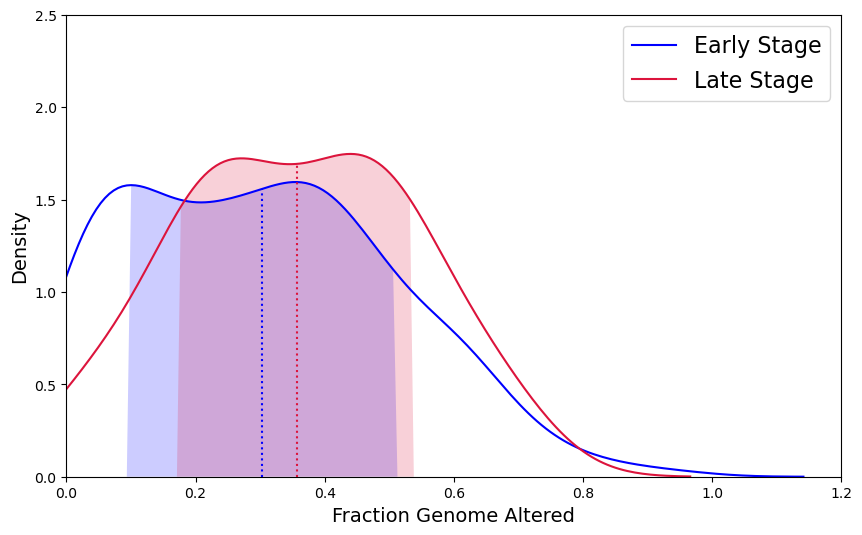

In [88]:
plt.figure(figsize=(10, 6))

sns.kdeplot(early_stage_fga, color="blue", fill=False, label='Early Stage')
early_mean = early_stage_fga.mean()
early_std = early_stage_fga.std()
kdeline = plt.gca().lines[0]  
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = early_mean
sdev = early_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)

# Late Stage Plot
sns.kdeplot(late_stage_fga, color="crimson", fill=False, label='Late Stage')
late_mean = late_stage_fga.mean()
late_std = late_stage_fga.std()
kdeline2 = plt.gca().lines[1]  
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = late_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson',  ls=':')
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  

# plt.title('Distribution of FGA by Stage')
plt.xlabel('Fraction Genome Altered', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=16)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\stage_fga.png', dpi = 600)

plt.show()


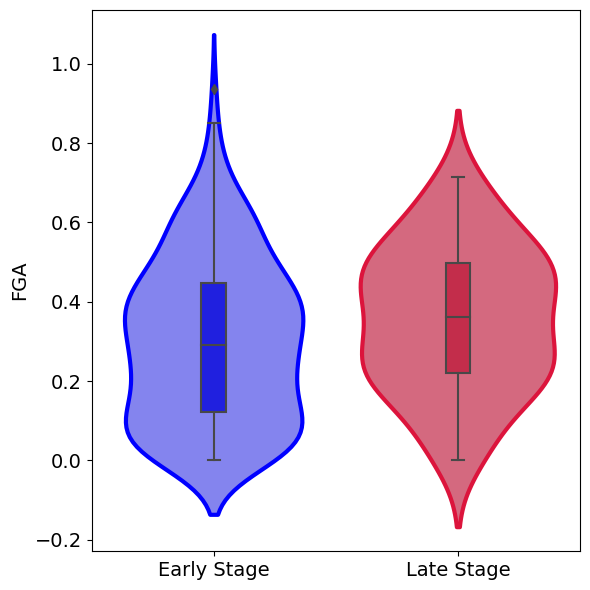

In [137]:
fig, ax = plt.subplots(figsize=(6, 6))
violin_plot = sns.violinplot(
    x='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced',
    y='FRACTION_GENOME_ALTERED',
    data=staging_fga_df,
    palette=['#7373FF', '#E65774'],
    inner=None,
    # saturation=0.7,
    ax=ax
)
colors = ['blue', 'crimson']
for i, patch in enumerate(violin_plot.collections[::1]):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(3)

box_plot = sns.boxplot(
    data=staging_fga_df, 
    x='AJCC_PATHOLOGIC_TUMOR_STAGE_reduced', 
    y='FRACTION_GENOME_ALTERED',
    order=["Early Stage", "Late Stage"],
    width=0.1,
    boxprops={'zorder': 2},
    palette=['blue', 'crimson'],
)


violin_plot.set_ylabel("FGA", fontsize=14)
violin_plot.set_xlabel("", fontsize=14)
violin_plot.tick_params(labelsize=14)
violin_plot.grid(False)
plt.tight_layout()
plt.show()


- Central peak of early stage is lower than late stage -> early stage on average has smaller FGA than late stage
- while FGA increases with tumor stage, there is not a complete distinction between the stages based on FGA alone 

In [90]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, f_oneway


# Shapiro-Wilk test for normality
sw_early = shapiro(early_stage_fga)
sw_late = shapiro(late_stage_fga)

sw_early, sw_late

(ShapiroResult(statistic=0.9643707275390625, pvalue=5.107121069158893e-06),
 ShapiroResult(statistic=0.979041576385498, pvalue=0.5394207239151001))

In [91]:
mwu_test_result = mannwhitneyu(early_stage_fga, late_stage_fga)
mwu_test_result

MannwhitneyuResult(statistic=5111.0, pvalue=0.05490402800640411)

## Subtyping

In [96]:
excel_file_path = r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\eda.xlsx'

subtyping_df = pd.read_excel(excel_file_path, sheet_name='label_stats', index_col=0)

### Subtyping-staging

In [99]:
subtyping_stage_df = subtyping_df[['lung-cancer-subtyping', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']]
subtyping_stage_df.dropna(inplace=True)
subtyping_stage_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11912\745752058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtyping_stage_df.dropna(inplace=True)


,lung-cancer-subtyping,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced
Sample,,
0,LUSC,Early Stage
1,LUSC,Early Stage
4,LUSC,Early Stage
5,LUSC,Early Stage
8,LUSC,Late Stage
...,...,...
407,LUSC,Late Stage
408,LUAD,Early Stage
409,LUSC,Late Stage


In [111]:
contingency_table = pd.crosstab(subtyping_stage_df['lung-cancer-subtyping'], subtyping_stage_df['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced'])
contingency_table

AJCC_PATHOLOGIC_TUMOR_STAGE_reduced,Early Stage,Late Stage
lung-cancer-subtyping,,
LUAD,124,18
LUSC,134,31


In [104]:
# Chi-Square Test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 1.694149631336121, p-value: 0.19305485848667409


-> No significant correlation between staging and subtyping

### Subtyping-Purity

In [112]:
subtyping_purity_df = subtyping_df[['lung-cancer-subtyping', 'purity']]
subtyping_purity_df.dropna(inplace=True)
subtyping_purity_filtered_df = subtyping_purity_df[subtyping_purity_df['lung-cancer-subtyping'] != 'Normal']
subtyping_purity_filtered_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11912\1010074867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtyping_purity_df.dropna(inplace=True)


,lung-cancer-subtyping,purity
Sample,,
0,LUSC,0.48
1,LUSC,0.48
4,LUSC,0.29
5,LUSC,0.29
8,LUSC,0.77
...,...,...
407,LUSC,0.53
408,LUAD,0.50
409,LUSC,0.52


In [115]:
print(subtyping_purity_filtered_df['purity'].mean())
print(subtyping_purity_filtered_df['purity'].std())

0.4648039205109367
0.17883079449901979


In [117]:
luad_purity_df = subtyping_purity_filtered_df[subtyping_purity_filtered_df['lung-cancer-subtyping'] == 'LUAD']
lusc_purity_df = subtyping_purity_filtered_df[subtyping_purity_filtered_df['lung-cancer-subtyping'] == 'LUSC']
print(len(luad_purity_df))
print(len(lusc_purity_df))

140
166


In [118]:
luad_purity = luad_purity_df['purity']
lusc_purity = lusc_purity_df['purity']


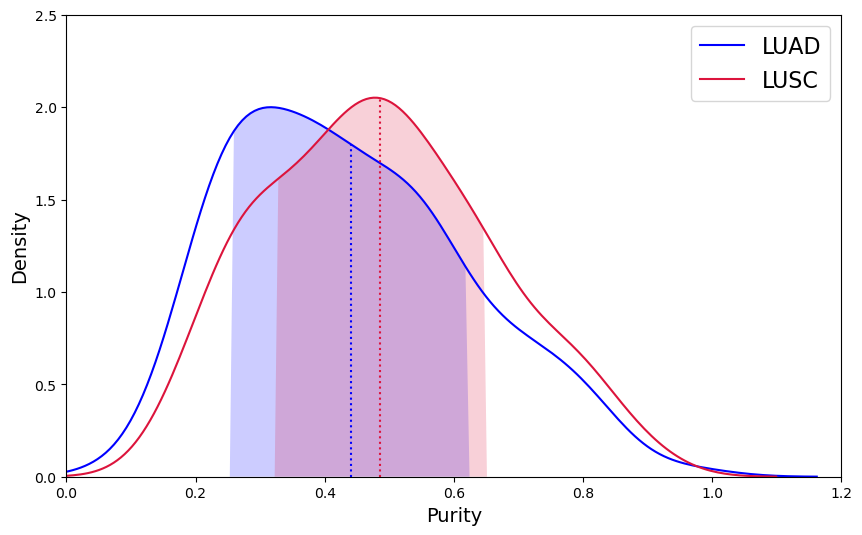

In [123]:
plt.figure(figsize=(10, 6))

# LUAD Plot
sns.kdeplot(luad_purity, color="blue", fill=False, label='LUAD')
luad_mean = luad_purity.mean()
luad_std = luad_purity.std()
kdeline = plt.gca().lines[0] 
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = luad_mean
sdev = luad_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)

# LUSC Plot
sns.kdeplot(lusc_purity, color="crimson", fill=False, label='LUSC')
lusc_mean = lusc_purity.mean()
lusc_std = lusc_purity.std()
kdeline2 = plt.gca().lines[1]  
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = lusc_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
# plt.title('Distribution of Purity by Stage')
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=16)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\subtype_purity.png', dpi = 600)
plt.show()


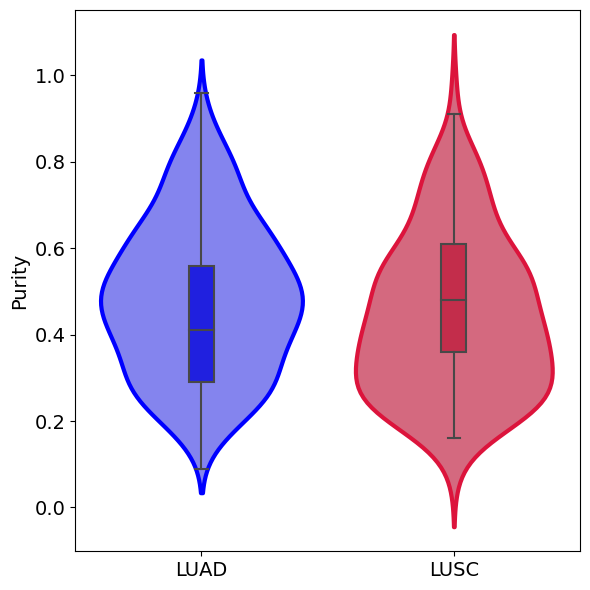

In [134]:
fig, ax = plt.subplots(figsize=(6, 6))
violin_plot = sns.violinplot(
    y='purity',
    x='lung-cancer-subtyping',
    data=subtyping_purity_filtered_df,
    palette=['#7373FF', '#E65774'],
    inner=None,
    # saturation=0.7,
    ax=ax
)
colors = ['blue', 'crimson']
for i, patch in enumerate(violin_plot.collections[::1]):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(3)

box_plot = sns.boxplot(
    data=subtyping_purity_filtered_df, 
    x='lung-cancer-subtyping', 
    y='purity',
    order=["LUAD", "LUSC"],
    width=0.1,
    boxprops={'zorder': 2},
    palette=['blue', 'crimson'],
)


violin_plot.set_ylabel("Purity", fontsize=14)
violin_plot.set_xlabel("", fontsize=14)
violin_plot.tick_params(labelsize=14)
violin_plot.grid(False)
plt.tight_layout()
plt.show()


In [139]:
sw_luad = shapiro(luad_purity)
sw_lusc = shapiro(lusc_purity)
sw_luad, sw_lusc

(ShapiroResult(statistic=0.9640471935272217, pvalue=0.0009696859633550048),
 ShapiroResult(statistic=0.9808514714241028, pvalue=0.021468747407197952))

In [141]:
mwu_test_result = mannwhitneyu(luad_purity, lusc_purity)
mwu_test_result

MannwhitneyuResult(statistic=9807.0, pvalue=0.018716274524421865)

## Subtyping-FGA

In [124]:
subtyping_fga_df = subtyping_df[['lung-cancer-subtyping', 'FRACTION_GENOME_ALTERED']]
subtyping_fga_df.dropna(inplace=True)
subtyping_fga_filtered_df = subtyping_fga_df[subtyping_fga_df['lung-cancer-subtyping'] != 'Normal']
subtyping_fga_filtered_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11912\905267992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtyping_fga_df.dropna(inplace=True)


,lung-cancer-subtyping,FRACTION_GENOME_ALTERED
Sample,,
0,LUSC,0.2702
1,LUSC,0.2702
4,LUSC,0.2552
5,LUSC,0.2552
8,LUSC,0.3907
...,...,...
407,LUSC,0.3365
408,LUAD,0.5443
409,LUSC,0.4490


In [126]:
print(subtyping_fga_filtered_df['FRACTION_GENOME_ALTERED'].mean())
print(subtyping_fga_filtered_df['FRACTION_GENOME_ALTERED'].std())

0.3084588433534491
0.20464212416418967


In [129]:
luad_fga_df = subtyping_fga_filtered_df[subtyping_fga_filtered_df['lung-cancer-subtyping'] == 'LUAD']
lusc_fga_df = subtyping_fga_filtered_df[subtyping_fga_filtered_df['lung-cancer-subtyping'] == 'LUSC']
print(len(luad_fga_df))
print(len(lusc_fga_df))

145
166


In [130]:
luad_fga = luad_fga_df['FRACTION_GENOME_ALTERED']
lusc_fga = lusc_fga_df['FRACTION_GENOME_ALTERED']


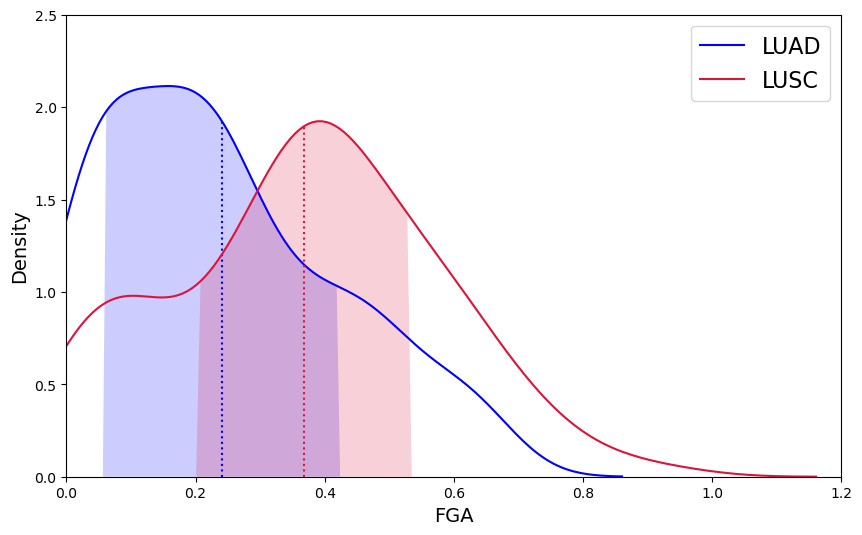

In [132]:
plt.figure(figsize=(10, 6))

# LUAD Plot
sns.kdeplot(luad_fga, color="blue", fill=False, label='LUAD')
luad_mean = luad_fga.mean()
luad_std = luad_fga.std()
kdeline = plt.gca().lines[0] 
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = luad_mean
sdev = luad_std
left = middle - sdev
right = middle + sdev
plt.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls=':')
plt.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.2)

# LUSC Plot
sns.kdeplot(lusc_fga, color="crimson", fill=False, label='LUSC')
lusc_mean = lusc_fga.mean()
lusc_std = lusc_fga.std()
kdeline2 = plt.gca().lines[1]  
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
middle2 = lusc_mean
sdev2 = late_std
left2 = middle2 - sdev2
right2 = middle2 + sdev2
plt.vlines(middle2, 0, np.interp(middle2, xs2, ys2), color='crimson', ls=':')
plt.fill_between(xs2, 0, ys2, where=(left2 <= xs2) & (xs2 <= right2), interpolate=True, facecolor='crimson', alpha=0.2)


plt.xlim(0, 1.2)  
plt.ylim(0, 2.5)  
# plt.title('Distribution of fga by Stage')
plt.xlabel('FGA', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=16)
plt.savefig(r'D:\CHI\2_RESEARCH\Research\DigitalPathology\Code\to-plot\plots\correlation\subtype_fga.png', dpi = 600)
plt.show()


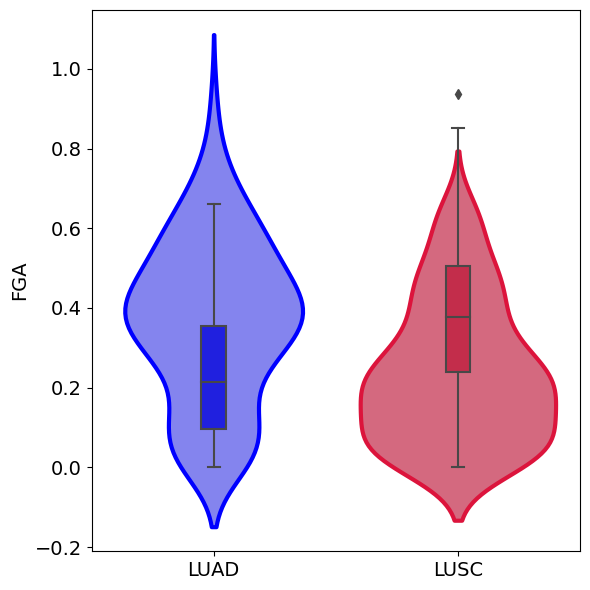

In [136]:
fig, ax = plt.subplots(figsize=(6, 6))
violin_plot = sns.violinplot(
    x='lung-cancer-subtyping',
    y='FRACTION_GENOME_ALTERED',
    data=subtyping_fga_filtered_df,
    palette=['#7373FF', '#E65774'],
    inner=None,
    # saturation=0.7,
    ax=ax
)
colors = ['blue', 'crimson']
for i, patch in enumerate(violin_plot.collections[::1]):
    patch.set_edgecolor(colors[i % len(colors)])
    patch.set_linewidth(3)

box_plot = sns.boxplot(
    data=subtyping_fga_filtered_df, 
    x='lung-cancer-subtyping', 
    y='FRACTION_GENOME_ALTERED',
    order=["LUAD", "LUSC"],
    width=0.1,
    boxprops={'zorder': 2},
    palette=['blue', 'crimson'],
)


violin_plot.set_ylabel("FGA", fontsize=14)
violin_plot.set_xlabel("", fontsize=14)
violin_plot.tick_params(labelsize=14)
violin_plot.grid(False)
plt.tight_layout()
plt.show()
